In [2]:
!pip install feature-engine

   ---------------------------------------- 0.0/357.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/357.1 kB ? eta -:--:--
   -- ------------------------------------ 20.5/357.1 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 41.0/357.1 kB 326.8 kB/s eta 0:00:01
   ----- --------------------------------- 51.2/357.1 kB 327.7 kB/s eta 0:00:01
   ----- --------------------------------- 51.2/357.1 kB 327.7 kB/s eta 0:00:01
   ---------------- --------------------- 153.6/357.1 kB 573.4 kB/s eta 0:00:01
   ----------------- -------------------- 163.8/357.1 kB 517.2 kB/s eta 0:00:01
   ------------------- ------------------ 184.3/357.1 kB 506.0 kB/s eta 0:00:01
   -------------------------- ----------- 245.8/357.1 kB 602.4 kB/s eta 0:00:01
   ------------------------------- ------ 297.0/357.1 kB 654.6 kB/s eta 0:00:01
   -------------------------------------  348.2/357.1 kB 720.5 kB/s eta 0:00:01
   -------------------------------------- 357.1/357.1 kB 

# Customer-Churn Prediction

- Training the customer churn prediction model
- Usage of Pipeline
- Usage of GridSearchCV

In [2]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

# Configurações do notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')
sns.set_palette('Paired')
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

In [3]:
df = pd.read_csv("D:\Applied DataScience\Telco-Customer-Churn.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Background Understanding


- customerID Unique customer identifier
- gender
- SeniorCitizen : Are you elderly?
- Partner : Do you have a partner?
- Dependents : Do you have dependents?
- tenure : Relationship length (in months)
- PhoneService : Do you have telephone service?
- MultipleLines : Does it have multiple lines? (Yes, no, there is no telephone service)
- InternetService : Internet service provider (DSL, Fiber or not)
- OnlineSecurity:  Do you have online insurance?
- OnlineBackup : Do you have online backup?
- DeviceProtection : Does it have device protection?
- TechSupport : Do you have technical support?
- StreamingTV : Do you have streaming TV?
- StreamingMovies : Do you have streaming movies?
- Contract : Type of contract (month-to-month, annual or bi-annual)
- PaperlessBilling : Do you receive invoices?
- PaymentMethod : Payment method
- MonthlyCharges : Service Fee
- TotalCharges : Total paid by the customer
- Churn : Churn?

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.shape

(7043, 21)

In [ ]:
for col in df.columns.to_list():
    print(df[col].name)
    print(df[col].unique())
    print("=" * 30)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [ ]:
import numpy as np
df.TotalCharges = df.TotalCharges.replace(' ', np.nan)
#df.TotalCharges = df.TotalCharges.fillna("")
df.TotalCharges = df.TotalCharges.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7032.0,2283.30,2266.77,18.80,401.45,1397.48,3794.74,8684.80


In [ ]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

- There is a low number of elderly customers.
- On average, customers have been registered for more than 2 years.
- The average service price for services is $64.76.

In [ ]:
missing = df.isnull().sum().reset_index()

In [ ]:
missing.head(20)

,index,0
0,customerID,0
1,gender,0
2,SeniorCitizen,0
3,Partner,0
4,Dependents,0
5,tenure,0
6,PhoneService,0
7,MultipleLines,0
8,InternetService,0
9,OnlineSecurity,0


In [ ]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
churn_proportion = df.Churn.value_counts(normalize = True).reset_index()
churn_proportion['proportion'] = round((churn_proportion['proportion'] * 100), 2)
churn_proportion

,Churn,proportion
0,No,73.46
1,Yes,26.54


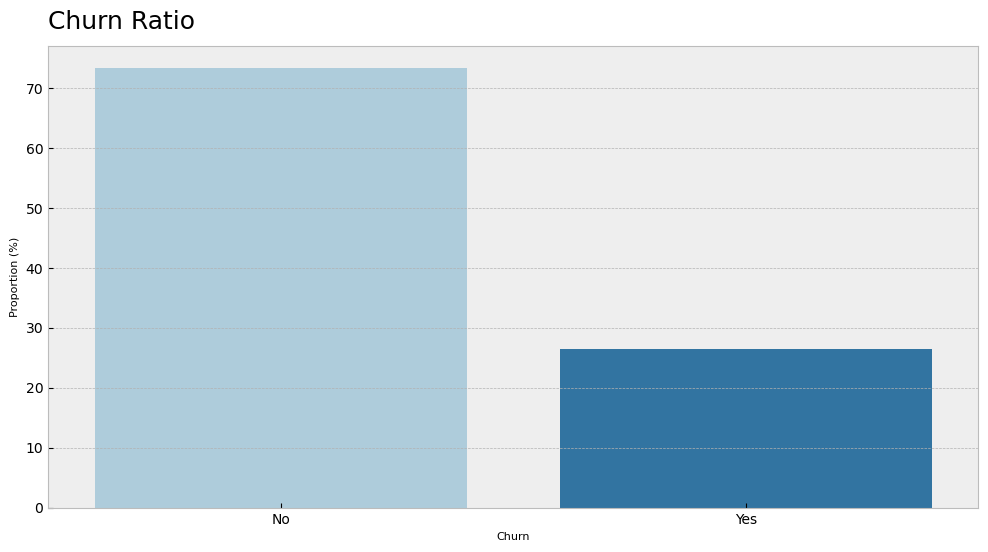

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(churn_proportion, x = 'Churn', y = 'proportion')
ax.set_title("Churn Ratio", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Churn", fontsize = 8)
ax.set_ylabel("Proportion (%)", fontsize = 8)
plt.show()

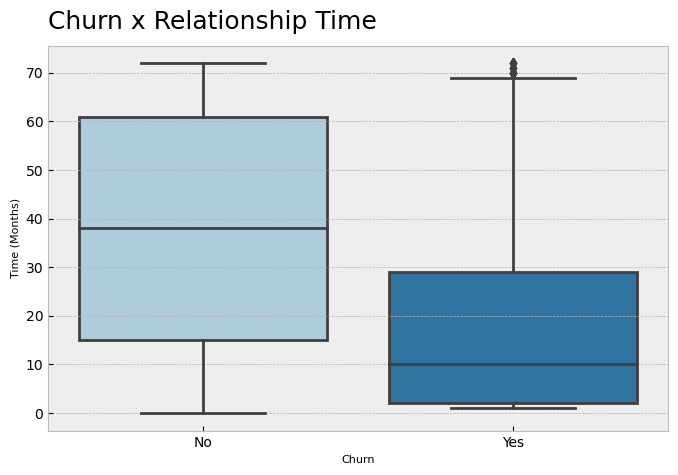

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.boxplot(df, x = 'Churn', y = 'tenure', palette='Paired')
ax.set_title("Churn x Relationship Time", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Churn", fontsize = 8)
ax.set_ylabel("Time (Months)", fontsize = 8)
plt.show()

People with a shorter relationship with Telcom have a greater tendency to churn.

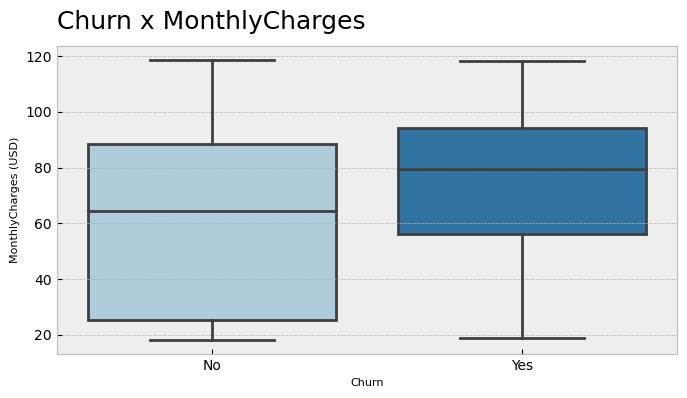

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(df, x = 'Churn', y = 'MonthlyCharges', palette='Paired')
ax.set_title("Churn x MonthlyCharges", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Churn", fontsize = 8)
ax.set_ylabel("MonthlyCharges (USD)", fontsize = 8)
plt.show()


People who pay higher service fees have a greater tendency to churn, let's look at the overview of the total value generated.

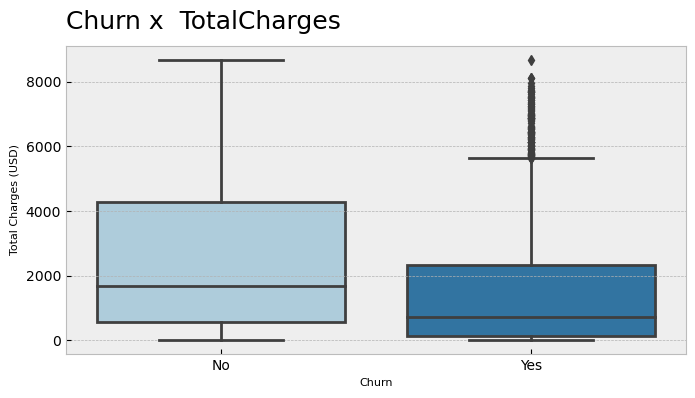

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(df, x = 'Churn', y = 'TotalCharges', palette='Paired')
ax.set_title("Churn x  TotalCharges", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Churn", fontsize = 8)
ax.set_ylabel("Total Charges (USD)", fontsize = 8)
plt.show()

In [ ]:
contract_churn = df.groupby(['Churn', 'Contract']).agg(Contagem = ('Churn', 'count')).reset_index()
contract_churn

,Churn,Contract,Contagem
0,No,Month-to-month,2220
1,No,One year,1307
2,No,Two year,1647
3,Yes,Month-to-month,1655
4,Yes,One year,166
5,Yes,Two year,48


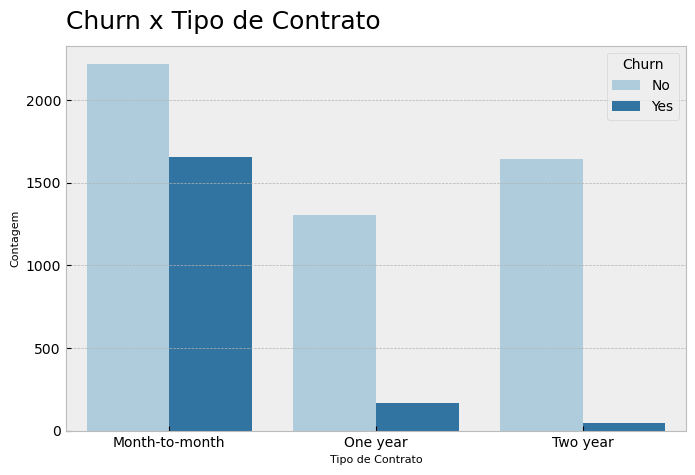

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.barplot(contract_churn, x = 'Contract', y = 'Contagem', hue = 'Churn')
ax.set_title("Churn x Tipo de Contrato", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("Tipo de Contrato", fontsize = 8)
ax.set_ylabel("Contagem", fontsize = 8)
plt.show()

Compared to other types of contracts, there is a greater volume of churn in month-to-month contracts.

In [ ]:
pay_churn = df.groupby(['PaymentMethod', 'Churn']).agg(Contagem = ('Churn', 'count')).reset_index()
pay_churn

,PaymentMethod,Churn,Contagem
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


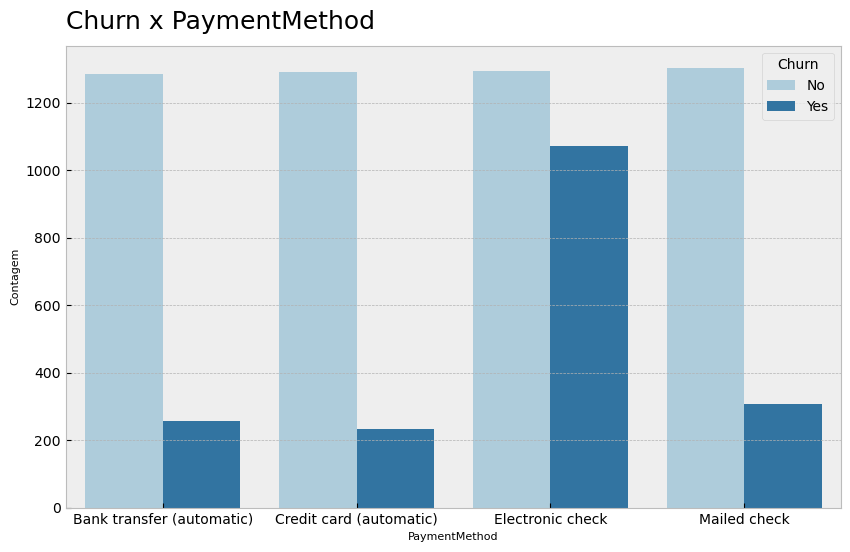

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(pay_churn, x = 'PaymentMethod', y = 'Contagem', hue = 'Churn')
ax.set_title("Churn x PaymentMethod", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("PaymentMethod", fontsize = 8)
ax.set_ylabel("Contagem", fontsize = 8)
plt.show()

Automatic payment methods have a lower tendency to churn, 'Electronic check' has a very high volume of churn compared to the rest.

In [ ]:
support_churn = df.groupby(['TechSupport', 'Churn']).agg(Contagem = ('Churn', 'count')).reset_index()
support_churn


,TechSupport,Churn,Contagem
0,No,No,2027
1,No,Yes,1446
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1734
5,Yes,Yes,310


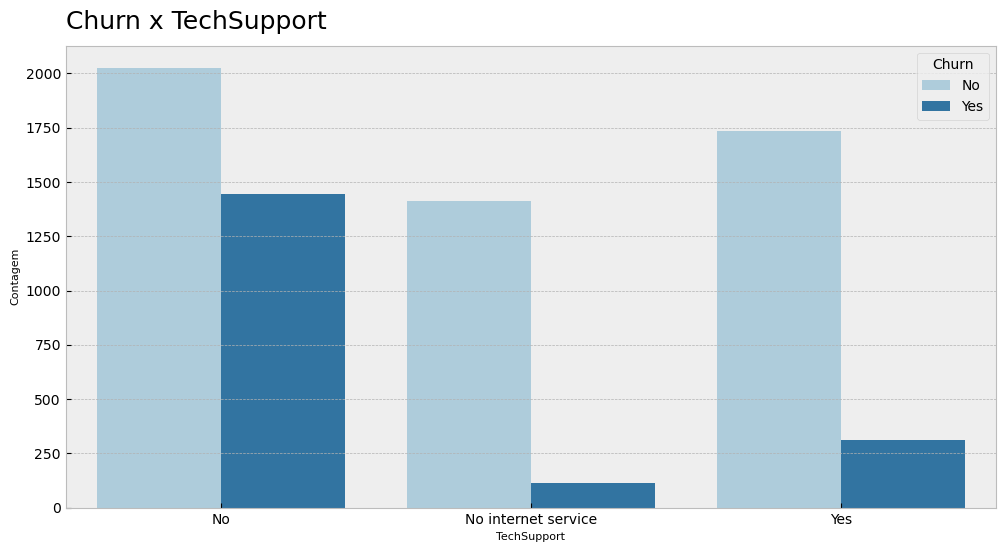

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(support_churn, x = 'TechSupport', y = 'Contagem', hue = 'Churn')
ax.set_title("Churn x TechSupport", loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel("TechSupport", fontsize = 8)
ax.set_ylabel("Contagem", fontsize = 8)
plt.show()

Lack of technical support also causes churn.

## Feature Transformation

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
X = df.drop(columns = ['customerID', 'Churn'])
y = df['Churn']

In [ ]:
cat_features = X.select_dtypes(include = 'object').columns.to_list()
num_features = X.select_dtypes(include = 'number').columns.to_list()

In [ ]:
num_transformer = Pipeline([
    ('imput_1', MeanMedianImputer(imputation_method='median'))
])

cat_transformer = Pipeline([
    ('imput_2', CategoricalImputer(imputation_method='frequent')),
    ('ohe', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 19) (1409, 19) (5634,) (1409,)


## Exploring Algorithm

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lr_model)
])

lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imput_1',
                                                                   MeanMedianImputer())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imput_2',
                                                                   CategoricalImputer(imputation_method='frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', LogisticRegression(random_state=42))])

In [ ]:
y_pred = lr_pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8026969481902059
[[926 109]
 [169 205]]


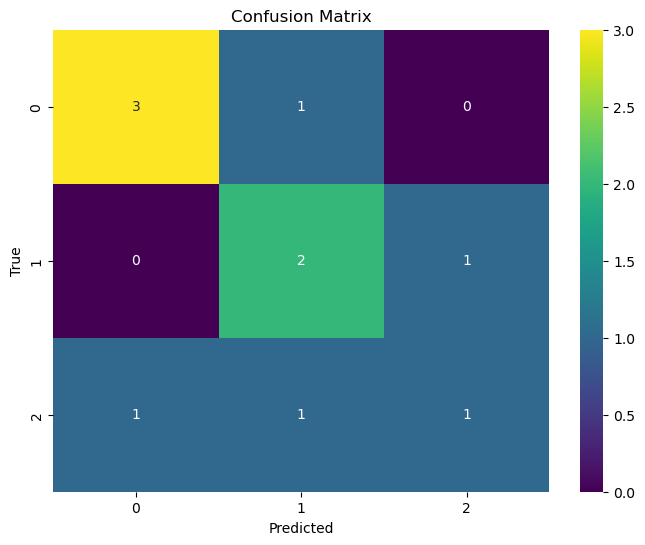

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Sample data
y_true = [0, 1, 2, 2, 0, 1, 0, 2, 1, 0]  # True labels
y_pred = [0, 2, 1, 2, 0, 1, 0, 0, 1, 1]  # Predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


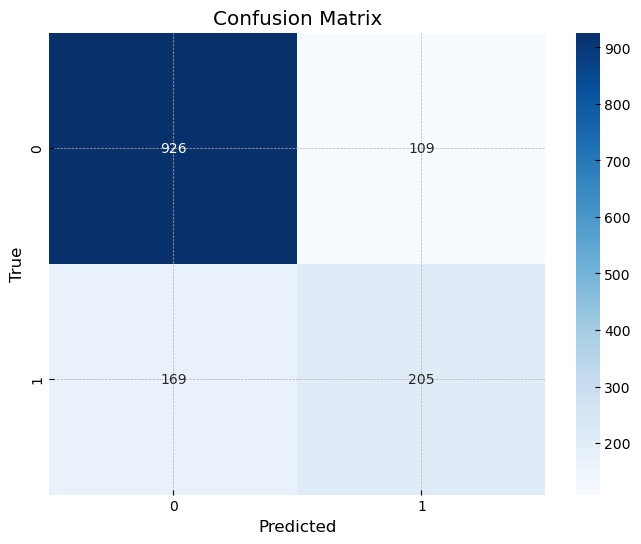

In [ ]:
# Create a heatmap using Seaborn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Classifier

In [ ]:
model = RandomForestClassifier(random_state=42)

rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imput_1',
                                                                   MeanMedianImputer())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imput_2',
                                                                   CategoricalImputer(imputation_method='frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

0.7799858055358411
[[917 118]
 [192 182]]


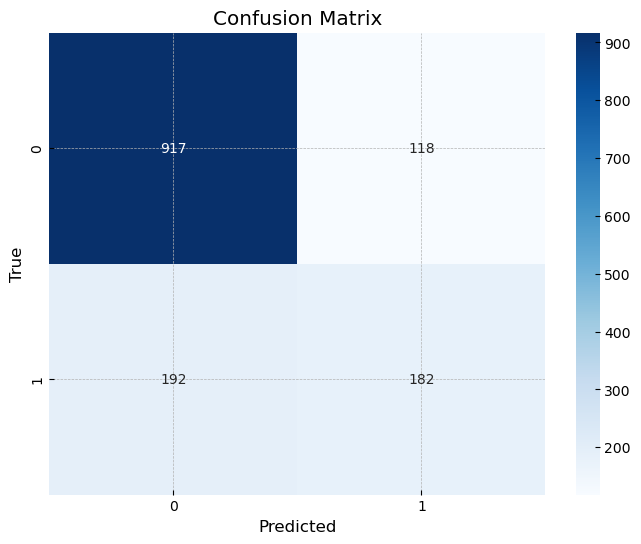

In [ ]:
# Create a heatmap using Seaborn
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Optimization of Hyperparameters

In [ ]:
model = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 50],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(model,
                    param_grid=params,
                    n_jobs=-1,
                    cv = 5,
                    scoring='roc_auc')

rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', grid)
])

rf.fit(X_train, y_train)

/Users/thetsu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/thetsu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/thetsu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/thetsu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/thetsu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imput_1',
                                                                   MeanMedianImputer())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imput_2',
                                                                   CategoricalImputer(imputation_method='frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLi...
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [10, 20, 50],
                                          'min_samples_split': [2, 5, 10],
                                          'n_estimators': [100, 300, 500]},
                              scoring='roc_auc'))])

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

0.8062455642299503
[[940  95]
 [178 196]]


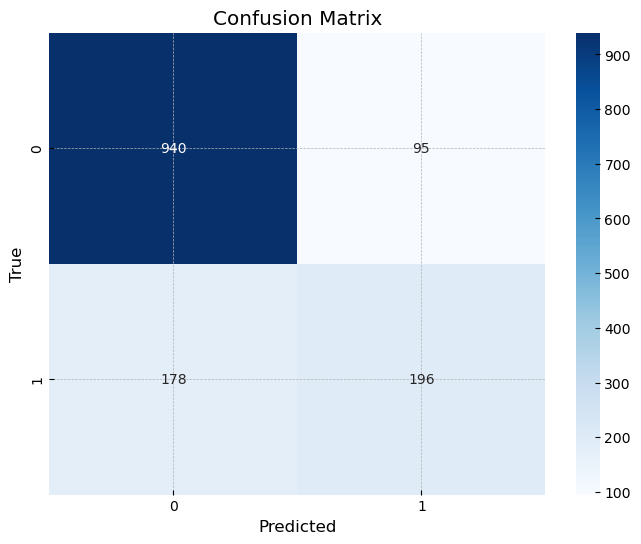

In [ ]:
# Create a heatmap using Seaborn
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

y_proba_train = rf.predict_proba(X_train)
y_proba_test = rf.predict_proba(X_test)

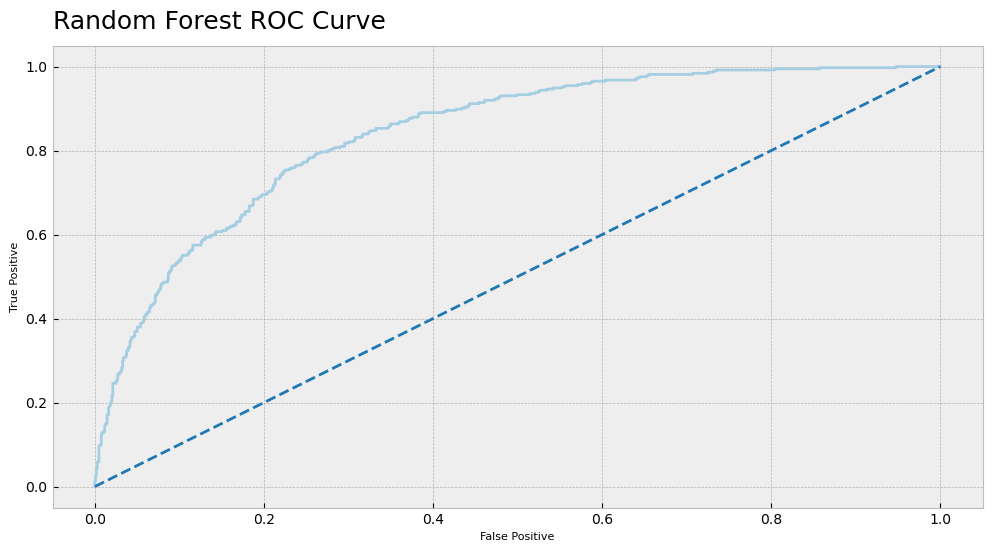

In [ ]:
curve = roc_curve(y_test, y_proba_test[:,1])

fig, ax = plt.subplots(figsize = (12, 6))
plt.plot(curve[0], curve[1])
plt.plot([0, 1], [0, 1], '--')
ax.set_title('Random Forest ROC Curve', loc = 'left', fontsize = 18, pad = 12)
ax.set_xlabel('False Positive', fontsize = 8)
ax.set_ylabel('True Positive', fontsize = 8)
plt.show()

In [ ]:
model = LogisticRegression(max_iter = 10000, random_state=42)

params = {
    'C': [0.001, 0.01, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(model,
                    param_grid=params,
                    n_jobs=-1,
                    cv=5,
                    scoring='roc_auc')

lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', grid)
])

lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imput_1',
                                                                   MeanMedianImputer())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imput_2',
                                                                   CategoricalImputer(imputation_method='frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(max_iter=10000,
                                                           random_state=42),
                              n_jobs=-1,
                              param_grid={'C': [0.001, 0.01, 1, 10, 100],
                                          'penalty': ['l1', 'l2']},
                              scoring='roc_auc'))])

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

0.8062455642299503
[[940  95]
 [178 196]]


In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



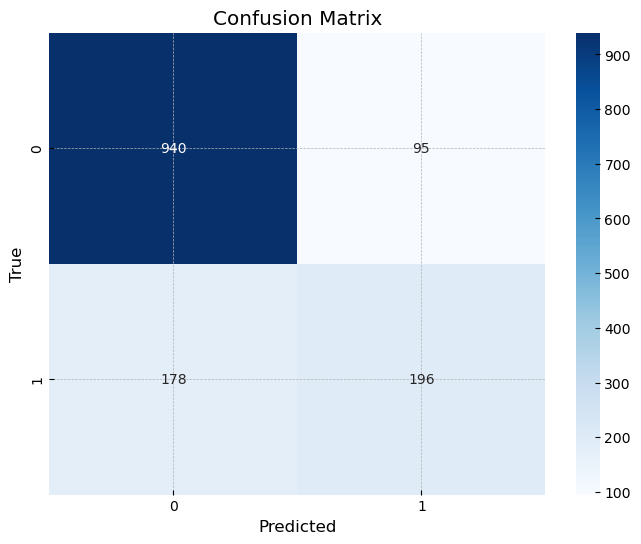

In [ ]:
# Create a heatmap using Seaborn
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

In [ ]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

from sklearn.datasets import make_classification

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

from sklearn.datasets import make_classification

X, y = make_classification(random_state=0)
pipeline = Pipeline([("scaler",StandardScaler()),("svm",SVC())])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

y_predict = pipeline.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test, y_predict)

In [ ]:
X

array([[-0.03926799,  0.13191176, -0.21120598, ...,  1.97698901,
         1.02122474, -0.46931074],
       [ 0.77416061,  0.10490717, -0.33281176, ...,  1.2678044 ,
         0.62251914, -1.49026539],
       [-0.0148577 ,  0.67057045, -0.21416666, ..., -0.10486202,
        -0.10169727, -0.45130304],
       ...,
       [ 0.29673317, -0.49610233, -0.86404499, ..., -1.10453952,
         2.01406015,  0.69042902],
       [ 0.08617684,  0.9836362 ,  0.17124355, ...,  2.11564734,
         0.11273794,  1.20985013],
       [-1.58249448, -1.42279491, -0.56430103, ...,  1.26661394,
        -1.31771734,  1.61805427]])

In [ ]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
pipeline = Pipeline([("scaler",StandardScaler()),("svm",SVC())])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

In [ ]:
y_predict = pipeline.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test, y_predict)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(y_test, y_predict)

0.8

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.78      0.78      0.78         9

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



In [ ]:
("name", Object)
"lr",SVM()

In [ ]:
Pipeline => Scaling, LinearRegression

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2077
           1       0.83      0.82      0.82      2051

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128



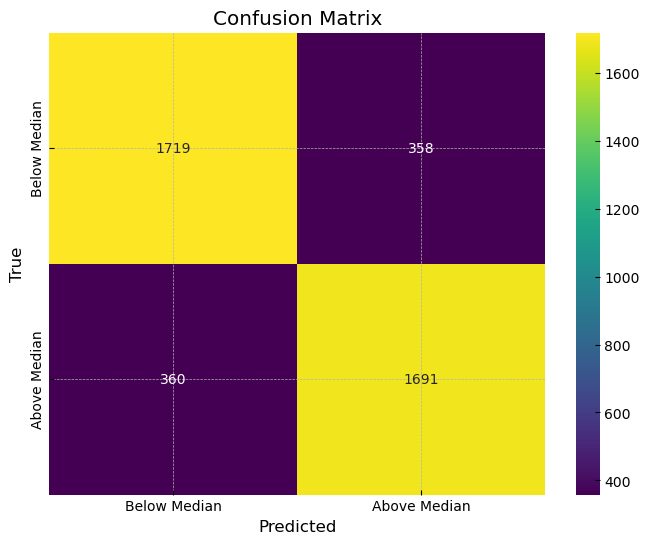

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Binarize the target: above or below the median
median_value = np.median(y)
y_binary = (y > median_value).astype(int)
## SMOTE
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Below Median', 'Above Median'], yticklabels=['Below Median', 'Above Median'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
